# CS235F25 HW 2

**Dataset:** Airbnb

# Imports

In [463]:
# [INSERT CODE TO IMPORT NECESSARY PYTHON PACKAGES HERE]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
import ast
import warnings
warnings.filterwarnings('ignore')

# 0. Load Data / Data Exploration

In [464]:
trainDF = pd.read_csv('train.csv')
testDF = pd.read_csv('test.csv')

In [465]:
# Inspected the data type of each feature
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26830 entries, 0 to 26829
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                26830 non-null  int64  
 1   name                              26823 non-null  object 
 2   summary                           25821 non-null  object 
 3   space                             18483 non-null  object 
 4   description                       26580 non-null  object 
 5   experiences_offered               26830 non-null  object 
 6   neighborhood_overview             16010 non-null  object 
 7   notes                             10740 non-null  object 
 8   transit                           16719 non-null  object 
 9   access                            15465 non-null  object 
 10  interaction                       14972 non-null  object 
 11  house_rules                       16051 non-null  object 
 12  host

In [466]:
# Checked for NULL, NA, and Duplicated row for the target variable 

print(f"Number of NA cells: {trainDF['price'].isna().sum()}")
print(f"Number of NULL cells: {trainDF['price'].isnull().sum()}")
print(f"Number of duplicated cells: {trainDF['price'].duplicated().sum()}") # keep duplicated rows because some Airbnb listings could have the same price

start_sample_count = trainDF.shape[0]
print(f"Number of samples: {start_sample_count}")

Number of NA cells: 0
Number of NULL cells: 0
Number of duplicated cells: 26301
Number of samples: 26830


In [467]:
# Inspect features for duplicates

# Turned off viewing limit
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(f"Number of duplicated rows: {trainDF.duplicated().sum()}")


Number of duplicated rows: 0


In [468]:
# Inspect features for NULL/ NA values
print(trainDF.isnull().sum()) # count of na values

id                                      0
name                                    7
summary                              1009
space                                8347
description                           250
experiences_offered                     0
neighborhood_overview               10820
notes                               16090
transit                             10111
access                              11365
interaction                         11858
house_rules                         10779
host_id                                 0
host_name                               4
host_since                              4
host_location                          87
host_about                          10497
host_response_time                  12998
host_response_rate                  12998
host_acceptance_rate                26830
host_is_superhost                       4
host_neighbourhood                   3774
host_listings_count                     4
host_verifications                

In [469]:
# Express NA values as percentages
((trainDF.isna().sum()/ len(trainDF)) * 100).round(2)

id                                    0.00
name                                  0.03
summary                               3.76
space                                31.11
description                           0.93
experiences_offered                   0.00
neighborhood_overview                40.33
notes                                59.97
transit                              37.69
access                               42.36
interaction                          44.20
house_rules                          40.18
host_id                               0.00
host_name                             0.01
host_since                            0.01
host_location                         0.32
host_about                           39.12
host_response_time                   48.45
host_response_rate                   48.45
host_acceptance_rate                100.00
host_is_superhost                     0.01
host_neighbourhood                   14.07
host_listings_count                   0.01
host_verifi

## Removed N/A values

In [470]:
# Identified that "square_feet" and "host_acceptance_rate" are almost completely NA (98.96% and 100% NA)
# Dropped all features that are over 50% NA ("Notes")
# Dropped "experience_offered" as all cells are listed with "None" instead of NA value

trainDF = trainDF.drop(columns = ["experiences_offered","square_feet", "host_acceptance_rate", "notes"], axis=1)
testDF = testDF.drop(columns = ["experiences_offered","square_feet", "host_acceptance_rate", "notes"], axis=1)
trainDF.head()

,id,name,summary,space,description,neighborhood_overview,transit,access,interaction,house_rules,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,country_code,country,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,15156865,"East 12th st, Lux Studio in Greenwich Village**",A 14-story luxury doorman building at the cent...,NaN,A 14-story luxury doorman building at the cent...,NaN,NaN,NaN,NaN,- Building management requires each new guest ...,22541573,Ken,2014-10-14,"New York, New York, United States","I work for Furnished Quarters, the largest pro...",within an hour,99%,t,Upper East Side,155.0,"['email', 'phone', 'reviews', 'jumio', 'kba', ...",t,t,East Village,Manhattan,New York,NY,10003.0,New York,US,United States,Serviced apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,G...",199.0,1,$0.00,30,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,flexible,f,f,98,NaN
1,14744912,"sunny airy bohemian rm, private bath! hip 'shwick",A full private bathroom makes you very comfort...,"Large square room, full private bathroom in ha...",A full private bathroom makes you very comfort...,"Interesting street art, people watching, aweso...",We're less than one block away from the L trai...,coin-op laundry room in basement.,I will be available in person or online if you...,"For any questions you must contact us, do not ...",948164,Theodora,2011-08-09,"New York, New York, United States","I am a young professional in Brooklyn, NY. I h...",NaN,NaN,f,NaN,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Bushwick,Brooklyn,Brooklyn,NY,11237.0,New York,US,United States,Apartment,Private room,3,1.0,1.0,2.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",80.0,1,$10.00,2,300,4,2016-09-06,2018-04-30,95.0,10.0,10.0,10.0,10.0,10.0,10.0,t,f,strict_14_with_grace_period,f,f,1,0.15
2,20280692,"2 bedroom New York, Queens",Quiet 2 bedroom apartment minutes from Astoria...,NaN,Quiet 2 bedroom apartment minutes from Astoria...,NaN,NaN,NaN,NaN,NaN,46407533,Alba,2015-10-12,"New York, New York, United States",NaN,within an hour,100%,f,NaN,1.0,"['email', 'phone', 'reviews']",t,f,Ditmars Steinway,Queens,Queens,NY,11105.0,New York,US,United States,Apartment,Entire home/apt,4,1.0,2.0,3.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",160.0,1,$0.00,5,1125,2,2017-09-03,2018-09-02,100.0,10.0,10.0,8.0,9.0,9.0,10.0,t,f,flexible,f,f,1,0.14
3,3716193,Beautiful 2 Bedroom Townhouse,"Sunny, spacious, beautifully renovated 2 bedro...","Sunny, spacious, beautifully renovated 2 bedro...","Sunny, spacious, beautifully renovated 2 bedro...","Beautiful brownstones, strong community, block...",The A/C train on Nostrand Avenue is 7 minutes ...,"For your cooking needs, the kitchen is fully e...",Depends on the guest's preference but more tha...,"Please don't order pay-per-view movies, we hav...",18970667,"Erin, Avi, Kaleb & Shiloh",2014-07-27,"New York, New York, United States",We are a fun loving couple living in Bed-stuy ...,within an hour,100%,f,Bedford-Stuyvesant,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Bedford-Stuyvesant,Brooklyn,Brooklyn,NY,11216,New York,US,United States,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning..."

In [471]:
# Dropped columns that include textual summaries that vary depending on row (removed unstructured data with varying context)
# These columns include: "name", "summary", "space", "description", "neighborhood", "transit", "access", "interaction", "house_rules", "host_name", "host_about"
trainDF = trainDF.drop(columns=["name", "summary", "space", "description", "neighborhood_overview", "transit", "access", "interaction", "house_rules", "host_name", "host_about"], axis=1)
testDF = testDF.drop(columns=["name", "summary", "space", "description", "neighborhood_overview", "transit", "access", "interaction", "house_rules", "host_name", "host_about"], axis=1)
trainDF.head()

,id,host_id,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,country_code,country,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,15156865,22541573,2014-10-14,"New York, New York, United States",within an hour,99%,t,Upper East Side,155.0,"['email', 'phone', 'reviews', 'jumio', 'kba', ...",t,t,East Village,Manhattan,New York,NY,10003.0,New York,US,United States,Serviced apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,G...",199.0,1,$0.00,30,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,flexible,f,f,98,NaN
1,14744912,948164,2011-08-09,"New York, New York, United States",NaN,NaN,f,NaN,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Bushwick,Brooklyn,Brooklyn,NY,11237.0,New York,US,United States,Apartment,Private room,3,1.0,1.0,2.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",80.0,1,$10.00,2,300,4,2016-09-06,2018-04-30,95.0,10.0,10.0,10.0,10.0,10.0,10.0,t,f,strict_14_with_grace_period,f,f,1,0.15
2,20280692,46407533,2015-10-12,"New York, New York, United States",within an hour,100%,f,NaN,1.0,"['email', 'phone', 'reviews']",t,f,Ditmars Steinway,Queens,Queens,NY,11105.0,New York,US,United States,Apartment,Entire home/apt,4,1.0,2.0,3.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",160.0,1,$0.00,5,1125,2,2017-09-03,2018-09-02,100.0,10.0,10.0,8.0,9.0,9.0,10.0,t,f,flexible,f,f,1,0.14
3,3716193,18970667,2014-07-27,"New York, New York, United States",within an hour,100%,f,Bedford-Stuyvesant,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Bedford-Stuyvesant,Brooklyn,Brooklyn,NY,11216,New York,US,United States,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",100.0,2,$15.00,3,400,151,2014-08-09,2018-10-21,93.0,10.0,9.0,10.0,10.0,9.0,9.0,t,f,strict_14_with_grace_period,f,f,1,2.92
4,22410246,54586794,2016-01-14,"Paris, Île-de-France, France",NaN,NaN,f,Upper East Side,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Upper East Side,Manhattan,New York,NY,10022,New York,US,United States,Apartment,Entire home/apt,4,2.0,2.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,Gym,Elevat...",250.0,1,$0.00,2,7,1,2017-12-31,2017-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,flexible,f,f,1,0.10


In [472]:
# Dropped features that have little to no impact of prediction: "id", "host_id", "is_business_travel_ready"(all f), host_location, host_neighbourhood, state, market, country_code, country, zipcode
# Removed host_location b/c the same data is repeated in other features 
# Removed state, market, country_code, country b/c most if not all listings dominated by either NY or United states
# Removed host_neighbourhood b/c it is a duplicated feature with neighbourhood_group_cleansed with little negligable differences

trainDF = trainDF.drop(columns=["id", "host_id", "is_business_travel_ready", "host_location", "host_neighbourhood", "state", "market", "country_code", "country", "zipcode"], axis=1)
testDF = testDF.drop(columns=["id", "host_id", "is_business_travel_ready", "host_location", "host_neighbourhood", "state", "market", "country_code", "country", "zipcode"], axis=1)
trainDF.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,city,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2014-10-14,within an hour,99%,t,155.0,"['email', 'phone', 'reviews', 'jumio', 'kba', ...",t,t,East Village,Manhattan,New York,Serviced apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,G...",199.0,1,$0.00,30,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,f,f,98,NaN
1,2011-08-09,NaN,NaN,f,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Bushwick,Brooklyn,Brooklyn,Apartment,Private room,3,1.0,1.0,2.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",80.0,1,$10.00,2,300,4,2016-09-06,2018-04-30,95.0,10.0,10.0,10.0,10.0,10.0,10.0,t,strict_14_with_grace_period,f,f,1,0.15
2,2015-10-12,within an hour,100%,f,1.0,"['email', 'phone', 'reviews']",t,f,Ditmars Steinway,Queens,Queens,Apartment,Entire home/apt,4,1.0,2.0,3.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",160.0,1,$0.00,5,1125,2,2017-09-03,2018-09-02,100.0,10.0,10.0,8.0,9.0,9.0,10.0,t,flexible,f,f,1,0.14
3,2014-07-27,within an hour,100%,f,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Bedford-Stuyvesant,Brooklyn,Brooklyn,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",100.0,2,$15.00,3,400,151,2014-08-09,2018-10-21,93.0,10.0,9.0,10.0,10.0,9.0,9.0,t,strict_14_with_grace_period,f,f,1,2.92
4,2016-01-14,NaN,NaN,f,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Upper East Side,Manhattan,New York,Apartment,Entire home/apt,4,2.0,2.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,Gym,Elevat...",250.0,1,$0.00,2,7,1,2017-12-31,2017-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,f,f,1,0.10


In [473]:
# [host_response_rate] 

# Convert features from precentages (strings) to floats
trainDF["host_response_rate"] = trainDF["host_response_rate"].str.rstrip("%").astype(float)
testDF["host_response_rate"] = testDF["host_response_rate"].str.rstrip("%").astype(float)

median_response_rate = trainDF.loc[trainDF["host_response_rate"] < 100, "host_response_rate"].median() # since the distribution heavily-right skewed, median is calculated with values less than 100
trainDF["missing_host_response_rate"] = trainDF["host_response_rate"].isna().astype(int) # created another column to account for missing host_response_rates values (1 for present, 0 for missing)

median_response_rate_test = testDF.loc[testDF["host_response_rate"] < 100, "host_response_rate"].median() 
testDF["missing_host_response_rate"] = testDF["host_response_rate"].isna().astype(int) 

# Replaced "host_response_rate" NA values with median value
trainDF["host_response_rate"] = trainDF["host_response_rate"].fillna(median_response_rate)
testDF["host_response_rate"] = testDF["host_response_rate"].fillna(median_response_rate)



# "missing_host_response_rate" highlights rows that were previously NA/ NULL
trainDF[["host_response_rate", "missing_host_response_rate"]].head(5)

,host_response_rate,missing_host_response_rate
0,99.0,0
1,86.0,1
2,100.0,0
3,100.0,0
4,86.0,1


In [474]:
# [host_response_time]

# Created "missing_host_response_time" to account for missing host_response_rates values (1 for present, 0 for missing)
trainDF["missing_host_response_time"] = trainDF["host_response_time"].isna().astype(int)
testDF["missing_host_response_time"] = testDF["host_response_time"].isna().astype(int)

display(trainDF[["missing_host_response_time"]].value_counts())

# Add a "missing" cell for NA values in "host_response_time"
trainDF["host_response_time"] = trainDF["host_response_time"].fillna("missing")
testDF["host_response_time"] = testDF["host_response_time"].fillna("missing")

# Encoded values using Ordinal encoder
categories = [["missing", "within an hour", "within a few hours", "within a day", "a few days or more"]]
oc = OrdinalEncoder(categories=categories)
trainDF["host_response_time"] = oc.fit_transform(trainDF[["host_response_time"]])
testDF["host_response_time"] = oc.fit_transform(testDF[["host_response_time"]])

trainDF["host_response_time"].value_counts()


missing_host_response_time
0                             13832
1                             12998
Name: count, dtype: int64

host_response_time
0.0    12998
1.0     8224
2.0     2967
3.0     2210
4.0      431
Name: count, dtype: int64

In [475]:
# Drop NA values from the rest of the dataset
trainDF = trainDF.dropna()
testDF = testDF.dropna()
end_sample_count = trainDF.shape[0]
print(f"Percent of dataset retained after data cleaning: {(round(end_sample_count/start_sample_count, 2)*100)}%")

Percent of dataset retained after data cleaning: 77.0%


## Data Preprocessing

In [476]:
# Encoded all binary features
# f = 0.0, t = 1.0

binary_features = ["host_is_superhost", "host_has_profile_pic", "host_identity_verified", "instant_bookable", "require_guest_profile_picture","require_guest_phone_verification"]
encoding = {"f": 0.0, "t": 1.0}

for feature in binary_features:
    trainDF[feature] = trainDF[feature].replace({"f": 0.0, "t": 1.0})
    testDF[feature] = testDF[feature].replace({"f": 0.0, "t": 1.0})


In [477]:
# [host_response_rate]

# Scale data using standard scaler
scaler = StandardScaler()
trainDF[["host_response_rate"]] = scaler.fit_transform(trainDF[["host_response_rate"]])

testDF[["host_response_rate"]] = scaler.fit_transform(testDF[["host_response_rate"]])

trainDF[["host_response_rate"]].value_counts().head()

host_response_rate
-0.377657             8906
 0.791184             8518
-0.043703              651
-0.878590              285
-3.383251              156
Name: count, dtype: int64

In [478]:
# [bed_type] 

# Used One Hot Encoding to encode nominal data
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(trainDF[["bed_type"]])

# Concat data together with the main dataset
encoded_data = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(["bed_type"]), index=trainDF.index)
trainDF = pd.concat([trainDF, encoded_data], axis=1)

# Remove the original bed_type feature
trainDF = trainDF.drop(columns=["bed_type"], axis=1)

# Do same for testDF
encoded_data = encoder.fit_transform(testDF[["bed_type"]])

encoded_data = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(["bed_type"]), index=testDF.index)
testDF = pd.concat([testDF, encoded_data], axis=1)
testDF = testDF.drop(columns=["bed_type"], axis=1)

trainDF.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,city,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,missing_host_response_rate,missing_host_response_time,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
1,2011-08-09,0.0,-0.377657,0.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1.0,1.0,Bushwick,Brooklyn,Brooklyn,Apartment,Private room,3,1.0,1.0,2.0,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",80.0,1,$10.00,2,300,4,2016-09-06,2018-04-30,95.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,strict_14_with_grace_period,0.0,0.0,1,0.15,1,1,0.0,0.0,0.0,0.0,1.0
2,2015-10-12,1.0,0.791184,0.0,1.0,"['email', 'phone', 'reviews']",1.0,0.0,Ditmars Steinway,Queens,Queens,Apartment,Entire home/apt,4,1.0,2.0,3.0,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",160.0,1,$0.00,5,1125,2,2017-09-03,2018-09-02,100.0,10.0,10.0,8.0,9.0,9.0,10.0,1.0,flexible,0.0,0.0,1,0.14,0,0,0.0,0.0,0.0,0.0,1.0
3,2014-07-27,1.0,0.791184,0.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1.0,1.0,Bedford-Stuyvesant,Brooklyn,Brooklyn,Apartment,Entire home/apt,6,1.0,2.0,3.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",100.0,2,$15.00,3,400,151,2014-08-09,2018-10-21,93.0,10.0,9.0,10.0,10.0,9.0,9.0,1.0,strict_14_with_grace_period,0.0,0.0,1,2.92,0,0,0.0,0.0,0.0,0.0,1.0
5,2015-07-11,1.0,0.791184,0.0,1.0,"['email', 'phone', 'reviews']",1.0,0.0,Kips Bay,Manhattan,New York,Apartment,Entire home/apt,2,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",200.0,2,$50.00,2,1125,75,2015-09-21,2018-10-26,95.0,10.0,9.0,10.0,10.0,10.0,9.0,0.0,strict_14_with_grace_period,0.0,0.0,1,1.97,0,0,0.0,0.0,0.0,0.0,1.0
6,2017-05-22,1.0,0.791184,0.0,1.0,"['phone', 'reviews']",1.0,0.0,Astoria,Queens,Queens,Apartment,Private room,2,1.0,1.0,1.0,"{Wifi,""Air conditioning"",Kitchen,""Free street ...",60.0,1,$10.00,1,7,95,2017-06-11,2018-10-17,94.0,10.0,9.0,10.0,10.0,10.0,10.0,1.0,flexible,0.0,0.0,1,5.57,0,0,0.0,0.0,0.0,0.0,1.0


In [479]:
# [neighbourhood_group_cleansed] 
# Did the same process as bed_type

# Used One Hot Encoding to encode nominal data
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(trainDF[["neighbourhood_group_cleansed"]])

# Concat data together with the main dataset
encoded_data = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(["neighbourhood_group_cleansed"]), index=trainDF.index)
trainDF = pd.concat([trainDF, encoded_data], axis=1)

# Remove the original feature
trainDF = trainDF.drop(columns=["neighbourhood_group_cleansed"], axis=1)


# Do the same for testDF
encoded_data = encoder.fit_transform(testDF[["neighbourhood_group_cleansed"]])

encoded_data = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(["neighbourhood_group_cleansed"]), index=testDF.index)
testDF = pd.concat([testDF, encoded_data], axis=1)

testDF = testDF.drop(columns=["neighbourhood_group_cleansed"], axis=1)


trainDF.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,city,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,missing_host_response_rate,missing_host_response_time,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island
1,2011-08-09,0.0,-0.377657,0.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1.0,1.0,Bushwick,Brooklyn,Apartment,Private room,3,1.0,1.0,2.0,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",80.0,1,$10.00,2,300,4,2016-09-06,2018-04-30,95.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,strict_14_with_grace_period,0.0,0.0,1,0.15,1,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,2015-10-12,1.0,0.791184,0.0,1.0,"['email', 'phone', 'reviews']",1.0,0.0,Ditmars Steinway,Queens,Apartment,Entire home/apt,4,1.0,2.0,3.0,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",160.0,1,$0.00,5,1125,2,2017-09-03,2018-09-02,100.0,10.0,10.0,8.0,9.0,9.0,10.0,1.0,flexible,0.0,0.0,1,0.14,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,2014-07-27,1.0,0.791184,0.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1.0,1.0,Bedford-Stuyvesant,Brooklyn,Apartment,Entire home/apt,6,1.0,2.0,3.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",100.0,2,$15.00,3,400,151,2014-08-09,2018-10-21,93.0,10.0,9.0,10.0,10.0,9.0,9.0,1.0,strict_14_with_grace_period,0.0,0.0,1,2.92,0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5,2015-07-11,1.0,0.791184,0.0,1.0,"['email', 'phone', 'reviews']",1.0,0.0,Kips Bay,New York,Apartment,Entire home/apt,2,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",200.0,2,$50.00,2,1125,75,2015-09-21,2018-10-26,95.0,10.0,9.0,10.0,10.0,10.0,9.0,0.0,strict_14_with_grace_period,0.0,0.0,1,1.97,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,2017-05-22,1.0,0.791184,0.0,1.0,"['phone', 'reviews']",1.0,0.0,Astoria,Queens,Apartment,Private room,2,1.0,1.0,1.0,"{Wifi,""Air conditioning"",Kitchen,""Free street ...",60.0,1,$10.00,1,7,95,2017-06-11,2018-10-17,94.0,10.0,9.0,10.0,10.0,10.0,10.0,1.0,flexible,0.0,0.0,1,5.57,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [480]:
# [host_verifications, amenities]
# B/c of a large number of items for each feature, take the count of items per sample

def item_count(item):
    if pd.isna(item) or not isinstance(item, str): # defaults to 0 if sample is NA or if its not a string
        return 0
    
    try:
        parsed_value = ast.literal_eval(item) # converts string into set/ list

        if isinstance(parsed_value, (list, set)): # counts the number of items in the list/ set
            return len(parsed_value)
        
        elif isinstance(parsed_value, str): # if "parsed_value" is a string
            return len(parsed_value.split(","))
        
        else:
            return 0
        
    # Prevents ValueError: malformed node or string
    # If parsed_value is a malformed string, remove {}, split commas, and remove empty strings
    except Exception:
        cleaned = item.strip("{}").split(",") 
        return len([a for a in cleaned if a.strip() != ""])


# Apply the function to features
# [host_verifications]
trainDF["host_verifications"] = trainDF["host_verifications"].apply(item_count)

# [amenities]
trainDF["amenities"] = trainDF["amenities"].apply(item_count)


# Do the same for testDF
testDF["host_verifications"] = testDF["host_verifications"].apply(item_count)
testDF["amenities"] = testDF["amenities"].apply(item_count)


trainDF[["host_verifications", "amenities"]].head()


,host_verifications,amenities
1,6,30
2,3,16
3,5,16
5,3,14
6,2,23


In [481]:
# Apply log transform and standard scaling
scaler = StandardScaler()

trainDF["host_verifications"] = np.log1p(trainDF["host_verifications"])
trainDF["amenities"] = np.log1p(trainDF["amenities"])

trainDF["host_verifications"] = scaler.fit_transform(trainDF[["host_verifications"]])
trainDF["amenities"] = scaler.fit_transform(trainDF[["amenities"]])

# Do the same for testDF

testDF["host_verifications"] = np.log1p(testDF["host_verifications"])
testDF["amenities"] = np.log1p(testDF["amenities"])

testDF["host_verifications"] = scaler.fit_transform(testDF[["host_verifications"]])
testDF["amenities"] = scaler.fit_transform(testDF[["amenities"]])


trainDF[["host_verifications", "amenities"]].head()

,host_verifications,amenities
1,0.564236,0.941398
2,-1.093388,-0.391914
3,0.107630,-0.391914
5,-1.093388,-0.669692
6,-1.945523,0.373399


In [482]:
# ["cancellation_policy"]

# Ordinal encoded cancellation_policy feature

# Specify categories from least to most strict
cat_order = ["flexible", "moderate", "strict", "strict_14_with_grace_period", "super_strict_30", "super_strict_60"]
oe = OrdinalEncoder(categories=[cat_order])

# Replace cancellation_policy values with encoded values
trainDF["cancellation_policy"] = oe.fit_transform(trainDF[["cancellation_policy"]])
trainDF["cancellation_policy"].value_counts()

# Standardize using standard scalar 
scaler = StandardScaler()
trainDF["cancellation_policy"] = scaler.fit_transform(trainDF[["cancellation_policy"]])


# Do the same for testDF
testDF["cancellation_policy"] = oe.fit_transform(testDF[["cancellation_policy"]])
testDF["cancellation_policy"].value_counts()
testDF["cancellation_policy"] = scaler.fit_transform(testDF[["cancellation_policy"]])


trainDF["cancellation_policy"].value_counts()


cancellation_policy
 0.953033    10328
-0.602475     5433
-1.380229     4790
 2.508541       11
 1.730787        8
 0.175279        1
Name: count, dtype: int64

In [483]:
# [reviews_per_month]

# Standardized reviews_per_month with standard scaler b/c most values are already less than 1 with few outliers
scaler = StandardScaler()
trainDF["reviews_per_month"] = scaler.fit_transform(trainDF[["reviews_per_month"]])

# Do the same for testDF
testDF["reviews_per_month"] = scaler.fit_transform(testDF[["reviews_per_month"]])


trainDF["reviews_per_month"].head()

1   -0.782863
2   -0.788794
3    0.860012
5    0.296571
6    2.431716
Name: reviews_per_month, dtype: float64

In [484]:
# [city]

# Converted all cities to lower case and strip white spaces
trainDF["city"] = trainDF["city"].str.lower().str.strip()

# Do same for testDF
testDF["city"] = testDF["city"].str.lower().str.strip()

trainDF["city"].value_counts()
# Based on the distribution of cities, the dataset is heavily skewed towards 3 major cities: new york, brooklyn, and queens

city
new york                                  9375
brooklyn                                  8352
queens                                    1725
bronx                                      370
staten island                              143
astoria                                     95
flushing                                    67
long island city                            55
elmhurst                                    35
woodside                                    30
ridgewood                                   28
jamaica                                     25
jackson heights                             19
new york city                               12
east elmhurst                               10
rockaway beach                              10
sunnyside                                    9
forest hills                                 8
nyc                                          8
arverne                                      8
corona                                       7
far rock

In [485]:
# Only account for the top 5 cities in the dataset, set the rest as other
# (Only keep triple digit cities or more)

top_5 = trainDF["city"].value_counts().nlargest(5).index

trainDF.loc[~trainDF["city"].isin(top_5), "city"] = "other"

# Do same for testDF
testDF.loc[~testDF["city"].isin(top_5), "city"] = "other"

trainDF["city"].value_counts()

city
new york         9375
brooklyn         8352
queens           1725
other             606
bronx             370
staten island     143
Name: count, dtype: int64

In [486]:
# Since feature is nominal, encoded features using One-Hot Encoding
encoder = OneHotEncoder(sparse_output = False)
encoded_cities = encoder.fit_transform(trainDF[["city"]])

# Combine encoded features with the main dataset
encoded_cities = pd.DataFrame(encoded_cities, columns = encoder.get_feature_names_out(["city"]), index = trainDF.index)
trainDF = pd.concat([trainDF, encoded_cities], axis=1)

# Remove the original feature
trainDF = trainDF.drop(columns=["city"], axis=1)

# Do the same for testDF
encoded_cities = encoder.fit_transform(testDF[["city"]])
encoded_cities = pd.DataFrame(encoded_cities, columns = encoder.get_feature_names_out(["city"]), index = testDF.index)
testDF = pd.concat([testDF, encoded_cities], axis=1)
testDF = testDF.drop(columns=["city"], axis=1)

trainDF.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,missing_host_response_rate,missing_host_response_time,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,city_bronx,city_brooklyn,city_new york,city_other,city_queens,city_staten island
1,2011-08-09,0.0,-0.377657,0.0,1.0,0.564236,1.0,1.0,Bushwick,Apartment,Private room,3,1.0,1.0,2.0,0.941398,80.0,1,$10.00,2,300,4,2016-09-06,2018-04-30,95.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,0.953033,0.0,0.0,1,-0.782863,1,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2015-10-12,1.0,0.791184,0.0,1.0,-1.093388,1.0,0.0,Ditmars Steinway,Apartment,Entire home/apt,4,1.0,2.0,3.0,-0.391914,160.0,1,$0.00,5,1125,2,2017-09-03,2018-09-02,100.0,10.0,10.0,8.0,9.0,9.0,10.0,1.0,-1.380229,0.0,0.0,1,-0.788794,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2014-07-27,1.0,0.791184,0.0,1.0,0.107630,1.0,1.0,Bedford-Stuyvesant,Apartment,Entire home/apt,6,1.0,2.0,3.0,-0.391914,100.0,2,$15.00,3,400,151,2014-08-09,2018-10-21,93.0,10.0,9.0,10.0,10.0,9.0,9.0,1.0,0.953033,0.0,0.0,1,0.860012,0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,2015-07-11,1.0,0.791184,0.0,1.0,-1.093388,1.0,0.0,Kips Bay,Apartment,Entire home/apt,2,1.0,1.0,1.0,-0.669692,200.0,2,$50.00,2,1125,75,2015-09-21,2018-10-26,95.0,10.0,9.0,10.0,10.0,10.0,9.0,0.0,0.953033,0.0,0.0,1,0.296571,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,2017-05-22,1.0,0.791184,0.0,1.0,-1.945523,1.0,0.0,Astoria,Apartment,Private room,2,1.0,1.0,1.0,0.373399,60.0,1,$10.00,1,7,95,2017-06-11,2018-10-17,94.0,10.0,9.0,10.0,10.0,10.0,10.0,1.0,-1.380229,0.0,0.0,1,2.431716,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [487]:
# [neighbourhood_cleansed]

# Only take the top 10 neighborhoods (only neighborhoods over 500 samples)

# Create a filter targeting the top 10 neighborhoods
top_10 = trainDF["neighbourhood_cleansed"].value_counts().nlargest(10).index

# Applied filter and replace any neighborhoods outside of the top 10 with "other"
trainDF.loc[~trainDF["neighbourhood_cleansed"].isin(top_10), "neighbourhood_cleansed"] = "other"

# Do the same for testDF
testDF.loc[~testDF["neighbourhood_cleansed"].isin(top_10), "neighbourhood_cleansed"] = "other"

trainDF["neighbourhood_cleansed"].value_counts()

neighbourhood_cleansed
other                 10379
Williamsburg           1735
Bedford-Stuyvesant     1532
Harlem                 1220
Bushwick               1079
Hell's Kitchen          875
Upper West Side         849
East Village            843
Upper East Side         828
Crown Heights           656
Midtown                 575
Name: count, dtype: int64

In [488]:
# One-Hot Encoding
encoder = OneHotEncoder(sparse_output = False)
encoded_neighborhood = encoder.fit_transform(trainDF[["neighbourhood_cleansed"]])

# Combine encoded features with the main dataset
encoded_neighborhood = pd.DataFrame(encoded_neighborhood, columns = encoder.get_feature_names_out(["neighbourhood_cleansed"]), index = trainDF.index)
trainDF = pd.concat([trainDF, encoded_neighborhood], axis=1)

# Remove the original feature
trainDF = trainDF.drop(columns=["neighbourhood_cleansed"], axis=1)

# Do the same for testDF
encoder = OneHotEncoder(sparse_output = False)
encoded_neighborhood_test = encoder.fit_transform(testDF[["neighbourhood_cleansed"]])
encoded_neighborhood_test = pd.DataFrame(encoded_neighborhood_test, columns = encoder.get_feature_names_out(["neighbourhood_cleansed"]), index = testDF.index)
testDF = pd.concat([testDF, encoded_neighborhood_test], axis=1)
testDF = testDF.drop(columns=["neighbourhood_cleansed"], axis=1)


trainDF.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,missing_host_response_rate,missing_host_response_time,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,city_bronx,city_brooklyn,city_new york,city_other,city_queens,city_staten island,neighbourhood_cleansed_Bedford-Stuyvesant,neighbourhood_cleansed_Bushwick,neighbourhood_cleansed_Crown Heights,neighbourhood_cleansed_East Village,neighbourhood_cleansed_Harlem,neighbourhood_cleansed_Hell's Kitchen,neighbourhood_cleansed_Midtown,neighbourhood_cleansed_Upper East Side,neighbourhood_cleansed_Upper West Side,neighbourhood_cleansed_Williamsburg,neighbourhood_cleansed_other
1,2011-08-09,0.0,-0.377657,0.0,1.0,0.564236,1.0,1.0,Apartment,Private room,3,1.0,1.0,2.0,0.941398,80.0,1,$10.00,2,300,4,2016-09-06,2018-04-30,95.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,0.953033,0.0,0.0,1,-0.782863,1,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-10-12,1.0,0.791184,0.0,1.0,-1.093388,1.0,0.0,Apartment,Entire home/apt,4,1.0,2.0,3.0,-0.391914,160.0,1,$0.00,5,1125,2,2017-09-03,2018-09-02,100.0,10.0,10.0,8.0,9.0,9.0,10.0,1.0,-1.380229,0.0,0.0,1,-0.788794,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2014-07-27,1.0,0.791184,0.0,1.0,0.107630,1.0,1.0,Apartment,Entire home/apt,6,1.0,2.0,3.0,-0.391914,100.0,2,$15.00,3,400,151,2014-08-09,2018-10-21,93.0,10.0,9.0,10.0,10.0,9.0,9.0,1.0,0.953033,0.0,0.0,1,0.860012,0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2015-07-11,1.0,0.791184,0.0,1.0,-1.093388,1.0,0.0,Apartment,Entire home/apt,2,1.0,1.0,1.0,-0.669692,200.0,2,$50.00,2,1125,75,2015-09-21,2018-10-26,95.0,10.0,9.0,10.0,10.0,10.0,9.0,0.0,0.953033,0.0,0.0,1,0.296571,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,2017-05-22,1.0,0.791184,0.0,1.0,-1.945523,1.0,0.0,Apartment,Private room,2,1.0,1.0,1.0,0.373399,60.0,1,$10.00,1,7,95,2017-06-11,2018-10-17,94.0,10.0,9.0,10.0,10.0,10.0,10.0,1.0,-1.380229,0.0,0.0,1,2.431716,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [491]:
# [room_type]
# Similar to previous features: Applied one-hot encoding to nominal feaure

# One-Hot Encoding
encoder = OneHotEncoder(sparse_output = False)
encoded_rooms = encoder.fit_transform(trainDF[["room_type"]])

# Combine encoded features with the main dataset
encoded_rooms = pd.DataFrame(encoded_rooms, columns = encoder.get_feature_names_out(["room_type"]), index = trainDF.index)
trainDF = pd.concat([trainDF, encoded_rooms], axis=1)

# Remove the original feature
trainDF = trainDF.drop(columns=["room_type"], axis=1)


# Do the same for testDF
encoded_rooms = encoder.fit_transform(testDF[["room_type"]])
encoded_rooms = pd.DataFrame(encoded_rooms, columns = encoder.get_feature_names_out(["room_type"]), index = testDF.index)
testDF = pd.concat([testDF, encoded_rooms], axis=1)
testDF = testDF.drop(columns=["room_type"], axis=1)

trainDF.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,property_type,accommodates,bathrooms,bedrooms,beds,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,missing_host_response_rate,missing_host_response_time,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,city_bronx,city_brooklyn,city_new york,city_other,city_queens,city_staten island,neighbourhood_cleansed_Bedford-Stuyvesant,neighbourhood_cleansed_Bushwick,neighbourhood_cleansed_Crown Heights,neighbourhood_cleansed_East Village,neighbourhood_cleansed_Harlem,neighbourhood_cleansed_Hell's Kitchen,neighbourhood_cleansed_Midtown,neighbourhood_cleansed_Upper East Side,neighbourhood_cleansed_Upper West Side,neighbourhood_cleansed_Williamsburg,neighbourhood_cleansed_other,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
1,2011-08-09,0.0,-0.377657,0.0,1.0,0.564236,1.0,1.0,Apartment,3,1.0,1.0,2.0,0.941398,80.0,1,$10.00,2,300,4,2016-09-06,2018-04-30,95.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,0.953033,0.0,0.0,1,-0.782863,1,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2015-10-12,1.0,0.791184,0.0,1.0,-1.093388,1.0,0.0,Apartment,4,1.0,2.0,3.0,-0.391914,160.0,1,$0.00,5,1125,2,2017-09-03,2018-09-02,100.0,10.0,10.0,8.0,9.0,9.0,10.0,1.0,-1.380229,0.0,0.0,1,-0.788794,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,2014-07-27,1.0,0.791184,0.0,1.0,0.107630,1.0,1.0,Apartment,6,1.0,2.0,3.0,-0.391914,100.0,2,$15.00,3,400,151,2014-08-09,2018-10-21,93.0,10.0,9.0,10.0,10.0,9.0,9.0,1.0,0.953033,0.0,0.0,1,0.860012,0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,2015-07-11,1.0,0.791184,0.0,1.0,-1.093388,1.0,0.0,Apartment,2,1.0,1.0,1.0,-0.669692,200.0,2,$50.00,2,1125,75,2015-09-21,2018-10-26,95.0,10.0,9.0,10.0,10.0,10.0,9.0,0.0,0.953033,0.0,0.0,1,0.296571,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6,2017-05-22,1.0,0.791184,0.0,1.0,-1.945523,1.0,0.0,Apartment,2,1.0,1.0,1.0,0.373399,60.0,1,$10.00,1,7,95,2017-06-11,2018-10-17,94.0,10.0,9.0,10.0,10.0,10.0,10.0,1.0,-1.380229,0.0,0.0,1,2.431716,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [493]:
# [accommodates]

# Applied ordinal encoding to feature

# Gets a sorted list of uniques values for accommodates 
accomidations = list(trainDF["accommodates"].value_counts().sort_index().index)

# Apply ordinal encoding and replace accommodates values with encoded values
oe = OrdinalEncoder(categories=[accomidations])
trainDF["accommodates"] = oe.fit_transform(trainDF[["accommodates"]])

# Standardize using standard scalar 
scaler = StandardScaler()
trainDF["accommodates"] = scaler.fit_transform(trainDF[["accommodates"]])


# Do the same for test
accomidations = list(testDF["accommodates"].value_counts().sort_index().index)
oe = OrdinalEncoder(categories=[accomidations])
testDF["accommodates"] = oe.fit_transform(testDF[["accommodates"]])
testDF["accommodates"] = scaler.fit_transform(testDF[["accommodates"]])

trainDF["accommodates"].value_counts().head()

accommodates
-0.500542    9388
 0.575894    3210
-1.038760    2686
 0.037676    2469
 1.652330    1078
Name: count, dtype: int64

In [495]:
# [calculated_host_listings_count]

# Applied the same ordinal encoding and standardization process applied to the accommodates features

# Gets a sorted list of uniques values 
accomidations = list(trainDF["calculated_host_listings_count"].value_counts().sort_index().index)

# Apply ordinal encoding 
oe = OrdinalEncoder(categories=[accomidations])
trainDF["calculated_host_listings_count"] = oe.fit_transform(trainDF[["calculated_host_listings_count"]])

# Standardize using standard scalar 
scaler = StandardScaler()
trainDF["calculated_host_listings_count"] = scaler.fit_transform(trainDF[["calculated_host_listings_count"]])

# Apply the same to testDF
accomidations = list(testDF["calculated_host_listings_count"].value_counts().sort_index().index)
oe = OrdinalEncoder(categories=[accomidations])
testDF["calculated_host_listings_count"] = oe.fit_transform(testDF[["calculated_host_listings_count"]])
scaler = StandardScaler()
testDF["calculated_host_listings_count"] = scaler.fit_transform(testDF[["calculated_host_listings_count"]])


trainDF["calculated_host_listings_count"].value_counts().head()

calculated_host_listings_count
-0.299014    13653
-0.104436     3207
 0.090143     1264
 0.284722      678
 0.479301      339
Name: count, dtype: int64

In [497]:
# Apply standard scaler to numerical columns 
# Reduces range of features

# Apply standard scaling
scaler = StandardScaler()

# [review_scores_value]
trainDF["review_scores_value"] = scaler.fit_transform(trainDF[["review_scores_value"]])

# [review_scores_location]
trainDF["review_scores_location"] = scaler.fit_transform(trainDF[["review_scores_location"]])

# [review_scores_communication]
trainDF["review_scores_communication"] = scaler.fit_transform(trainDF[["review_scores_communication"]])

# [review_scores_checkin]
trainDF["review_scores_checkin"] = scaler.fit_transform(trainDF[["review_scores_checkin"]])

# [review_scores_cleanliness]
trainDF["review_scores_cleanliness"] = scaler.fit_transform(trainDF[["review_scores_cleanliness"]])

# [review_scores_accuracy]
trainDF["review_scores_accuracy"] = scaler.fit_transform(trainDF[["review_scores_accuracy"]])

# [review_scores_rating]
trainDF["review_scores_rating"] = scaler.fit_transform(trainDF[["review_scores_rating"]])

# [number_of_reviews]
# Applied log transformation to reduce skewness (b/c values ranges from 1 - 400+ reviews)
trainDF["number_of_reviews"] = np.log1p(trainDF["number_of_reviews"])
trainDF["number_of_reviews"] = scaler.fit_transform(trainDF[["number_of_reviews"]])

# [guests_included]
trainDF["guests_included"] = scaler.fit_transform(trainDF[["guests_included"]])

# [extra_people]
# Removed the '$' sign and applied standard scaler
trainDF["extra_people"] = trainDF["extra_people"].replace('[\$,]', '', regex = True).astype(float)
trainDF["extra_people"] = scaler.fit_transform(trainDF[["extra_people"]])

# [bed, bedrooms, bathrooms]
trainDF[["beds", "bedrooms", "bathrooms"]] = scaler.fit_transform(trainDF[["beds", "bedrooms", "bathrooms"]])


# DO the same for testDF
testDF["review_scores_value"] = scaler.fit_transform(testDF[["review_scores_value"]])
testDF["review_scores_location"] = scaler.fit_transform(testDF[["review_scores_location"]])
testDF["review_scores_communication"] = scaler.fit_transform(testDF[["review_scores_communication"]])
testDF["review_scores_checkin"] = scaler.fit_transform(testDF[["review_scores_checkin"]])
testDF["review_scores_cleanliness"] = scaler.fit_transform(testDF[["review_scores_cleanliness"]])
testDF["review_scores_accuracy"] = scaler.fit_transform(testDF[["review_scores_accuracy"]])
testDF["review_scores_rating"] = scaler.fit_transform(testDF[["review_scores_rating"]])

testDF["number_of_reviews"] = np.log1p(testDF["number_of_reviews"])
testDF["number_of_reviews"] = scaler.fit_transform(testDF[["number_of_reviews"]])

testDF["guests_included"] = scaler.fit_transform(testDF[["guests_included"]])

testDF["extra_people"] = testDF["extra_people"].replace('[\$,]', '', regex = True).astype(float)
testDF["extra_people"] = scaler.fit_transform(testDF[["extra_people"]])

testDF[["beds", "bedrooms", "bathrooms"]] = scaler.fit_transform(testDF[["beds", "bedrooms", "bathrooms"]])




trainDF.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,property_type,accommodates,bathrooms,bedrooms,beds,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,missing_host_response_rate,missing_host_response_time,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,city_bronx,city_brooklyn,city_new york,city_other,city_queens,city_staten island,neighbourhood_cleansed_Bedford-Stuyvesant,neighbourhood_cleansed_Bushwick,neighbourhood_cleansed_Crown Heights,neighbourhood_cleansed_East Village,neighbourhood_cleansed_Harlem,neighbourhood_cleansed_Hell's Kitchen,neighbourhood_cleansed_Midtown,neighbourhood_cleansed_Upper East Side,neighbourhood_cleansed_Upper West Side,neighbourhood_cleansed_Williamsburg,neighbourhood_cleansed_other,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
1,2011-08-09,0.0,-0.377657,0.0,1.0,0.564236,1.0,1.0,Apartment,0.037676,-0.326719,-0.235111,0.376981,0.941398,80.0,-0.500360,-0.247237,2,300,-0.711639,2016-09-06,2018-04-30,0.146974,0.486402,0.68880,0.369716,0.352924,0.6418,0.700220,1.0,0.953033,0.0,0.0,-0.299014,-0.782863,1,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2015-10-12,1.0,0.791184,0.0,1.0,-1.093388,1.0,0.0,Apartment,0.575894,-0.326719,1.121923,1.313561,-0.391914,160.0,-0.500360,-0.651568,5,1125,-1.106673,2017-09-03,2018-09-02,0.750521,0.486402,0.68880,-2.472900,-1.092141,-0.6470,0.700220,1.0,-1.380229,0.0,0.0,-0.299014,-0.788794,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,2014-07-27,1.0,0.791184,0.0,1.0,0.107630,1.0,1.0,Apartment,1.652330,-0.326719,1.121923,1.313561,-0.391914,100.0,0.366119,-0.045072,3,400,1.928835,2014-08-09,2018-10-21,-0.094445,0.486402,-0.24003,0.369716,0.352924,-0.6470,-0.425638,1.0,0.953033,0.0,0.0,-0.299014,0.860012,0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,2015-07-11,1.0,0.791184,0.0,1.0,-1.093388,1.0,0.0,Apartment,-0.500542,-0.326719,-0.235111,-0.559599,-0.669692,200.0,0.366119,1.370086,2,1125,1.392807,2015-09-21,2018-10-26,0.146974,0.486402,-0.24003,0.369716,0.352924,0.6418,-0.425638,0.0,0.953033,0.0,0.0,-0.299014,0.296571,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6,2017-05-22,1.0,0.791184,0.0,1.0,-1.945523,1.0,0.0,Apartment,-0.500542,-0.326719,-0.235111,-0.559599,0.373399,60.0,-0.500360,-0.247237,1,7,1.573467,2017-06-11,2018-10-17,0.026265,0.486402,-0.24003,0.369716,0.352924,0.6418,0.700220,1.0,-1.380229,0.0,0.0,-0.299014,2.431716,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [499]:
# [property_type]

# Converted all samples to lowercase and removed whitespaces
trainDF["property_type"] = trainDF["property_type"].str.lower().str.strip()

# Create a filter targeting apartment types with above 100 samples (top 7)
top_10 = trainDF["property_type"].value_counts().nlargest(7).index

# Applied filter and replace any samples outside of the top 7 with "other"
trainDF.loc[~trainDF["property_type"].isin(top_10), "property_type"] = "other"
trainDF["property_type"].value_counts()

# Nominal encoding with one hot encoder
encoder = OneHotEncoder(sparse_output = False)
encoded_property = encoder.fit_transform(trainDF[["property_type"]])

# Combine encoded features with the main dataset
encoded_property = pd.DataFrame(encoded_property, columns = encoder.get_feature_names_out(["property_type"]), index = trainDF.index)
trainDF = pd.concat([trainDF, encoded_property], axis=1)

# Remove the original feature
trainDF = trainDF.drop(columns=["property_type"], axis=1)


# Do same for testDF
testDF["property_type"] = testDF["property_type"].str.lower().str.strip()
top_10 = testDF["property_type"].value_counts().nlargest(7).index

testDF.loc[~testDF["property_type"].isin(top_10), "property_type"] = "other"
testDF["property_type"].value_counts()

encoder = OneHotEncoder(sparse_output = False)
encoded_property = encoder.fit_transform(testDF[["property_type"]])

encoded_property = pd.DataFrame(encoded_property, columns = encoder.get_feature_names_out(["property_type"]), index = testDF.index)
testDF = pd.concat([testDF, encoded_property], axis=1)

testDF = testDF.drop(columns=["property_type"], axis=1)



trainDF.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,missing_host_response_rate,missing_host_response_time,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,city_bronx,city_brooklyn,city_new york,city_other,city_queens,city_staten island,neighbourhood_cleansed_Bedford-Stuyvesant,neighbourhood_cleansed_Bushwick,neighbourhood_cleansed_Crown Heights,neighbourhood_cleansed_East Village,neighbourhood_cleansed_Harlem,neighbourhood_cleansed_Hell's Kitchen,neighbourhood_cleansed_Midtown,neighbourhood_cleansed_Upper East Side,neighbourhood_cleansed_Upper West Side,neighbourhood_cleansed_Williamsburg,neighbourhood_cleansed_other,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,property_type_apartment,property_type_condominium,property_type_guest suite,property_type_house,property_type_loft,property_type_other,property_type_serviced apartment,property_type_townhouse
1,2011-08-09,0.0,-0.377657,0.0,1.0,0.564236,1.0,1.0,0.037676,-0.326719,-0.235111,0.376981,0.941398,80.0,-0.500360,-0.247237,2,300,-0.711639,2016-09-06,2018-04-30,0.146974,0.486402,0.68880,0.369716,0.352924,0.6418,0.700220,1.0,0.953033,0.0,0.0,-0.299014,-0.782863,1,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-10-12,1.0,0.791184,0.0,1.0,-1.093388,1.0,0.0,0.575894,-0.326719,1.121923,1.313561,-0.391914,160.0,-0.500360,-0.651568,5,1125,-1.106673,2017-09-03,2018-09-02,0.750521,0.486402,0.68880,-2.472900,-1.092141,-0.6470,0.700220,1.0,-1.380229,0.0,0.0,-0.299014,-0.788794,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2014-07-27,1.0,0.791184,0.0,1.0,0.107630,1.0,1.0,1.652330,-0.326719,1.121923,1.313561,-0.391914,100.0,0.366119,-0.045072,3,400,1.928835,2014-08-09,2018-10-21,-0.094445,0.486402,-0.24003,0.369716,0.352924,-0.6470,-0.425638,1.0,0.953033,0.0,0.0,-0.299014,0.860012,0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2015-07-11,1.0,0.791184,0.0,1.0,-1.093388,1.0,0.0,-0.500542,-0.326719,-0.235111,-0.559599,-0.669692,200.0,0.366119,1.370086,2,1125,1.392807,2015-09-21,2018-10-26,0.146974,0.486402,-0.24003,0.369716,0.352924,0.6418,-0.425638,0.0,0.953033,0.0,0.0,-0.299014,0.296571,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2017-05-22,1.0,0.791184,0.0,1.0,-1.945523,1.0,0.0,-0.500542,-0.326719,-0.235111,-0.559599,0.373399,60.0,-0.500360,-0.247237,1,7,1.573467,2017-06-11,2018-10-17,0.026265,0.486402,-0.24003,0.369716,0.352924,0.6418,0.700220,1.0,-1.380229,0.0,0.0,-0.299014,2.431716,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [501]:
# [mimimum_nights, maximum_nights]
# Similar to amenities, apply log transforma and standard scaling due to variance in range

trainDF["minimum_nights"] = np.log1p(trainDF["minimum_nights"])
trainDF["maximum_nights"] = np.log1p(trainDF["maximum_nights"])

scaler = StandardScaler()

trainDF["minimum_nights"] = scaler.fit_transform(trainDF[["minimum_nights"]])
trainDF["maximum_nights"] = scaler.fit_transform(trainDF[["maximum_nights"]])

# Do the same for testDF
testDF["minimum_nights"] = np.log1p(testDF["minimum_nights"])
testDF["maximum_nights"] = np.log1p(testDF["maximum_nights"])

scaler = StandardScaler()

testDF["minimum_nights"] = scaler.fit_transform(testDF[["minimum_nights"]])
testDF["maximum_nights"] = scaler.fit_transform(testDF[["maximum_nights"]])


trainDF[["minimum_nights", "maximum_nights"]].value_counts().head()

minimum_nights  maximum_nights
-0.922949       0.912332          3139
-0.404996       0.912332          2444
-0.037503       0.912332          1582
 2.578278       0.912332           591
 0.480449       0.912332           515
Name: count, dtype: int64

In [503]:
# [first_reveiw, last_review]
# Calculated the number of days between first and last reveiw
# Stored output as a new feature

# Set to datetime
trainDF["first_review"] = pd.to_datetime(trainDF["first_review"], errors="coerce")
trainDF["last_review"] = pd.to_datetime(trainDF["last_review"], errors="coerce")

# Calculate number of days and create a new feature
trainDF["days_between_reviews"] = (trainDF["last_review"] - trainDF["first_review"]).dt.days

# Drop first and last reveiw columns
trainDF = trainDF.drop(columns=["first_review", "last_review"], axis=1)

# log transform
trainDF["days_between_reviews"] = np.log1p(trainDF["days_between_reviews"])

# Scale using standard scaler
scaler = StandardScaler()
trainDF["days_between_reviews"] = scaler.fit_transform(trainDF[["days_between_reviews"]])


# Do the same for testDF
testDF["first_review"] = pd.to_datetime(testDF["first_review"], errors="coerce")
testDF["last_review"] = pd.to_datetime(testDF["last_review"], errors="coerce")

testDF["days_between_reviews"] = (testDF["last_review"] - testDF["first_review"]).dt.days

testDF = testDF.drop(columns=["first_review", "last_review"], axis=1)

testDF["days_between_reviews"] = np.log1p(testDF["days_between_reviews"])

scaler = StandardScaler()
testDF["days_between_reviews"] = scaler.fit_transform(testDF[["days_between_reviews"]])



trainDF["days_between_reviews"].value_counts().head()

days_between_reviews
-2.229480    2298
-1.252813      99
-1.305167      86
-0.855510      78
-1.514084      75
Name: count, dtype: int64

In [505]:
# [host_since]

# Subtract todays date from the listed date, get difference in days
today = pd.Timestamp.today()
trainDF["host_since"] = pd.to_datetime(trainDF["host_since"])

trainDF["host_since"] = (today - trainDF["host_since"]).dt.days
trainDF["host_since"].head()

trainDF["host_since"] = np.log1p(trainDF["host_since"])

scaler = StandardScaler()
trainDF["host_since"] = scaler.fit_transform(trainDF[["host_since"]])

# Do the same for testDF
today = pd.Timestamp.today()
testDF["host_since"] = pd.to_datetime(testDF["host_since"])

testDF["host_since"] = (today - testDF["host_since"]).dt.days
testDF["host_since"].head()

testDF["host_since"] = np.log1p(testDF["host_since"])

scaler = StandardScaler()
testDF["host_since"] = scaler.fit_transform(testDF[["host_since"]])


trainDF["host_since"].value_counts().head()

host_since
-0.531799    60
-0.420555    51
 0.322320    42
-0.065078    37
 0.694762    36
Name: count, dtype: int64

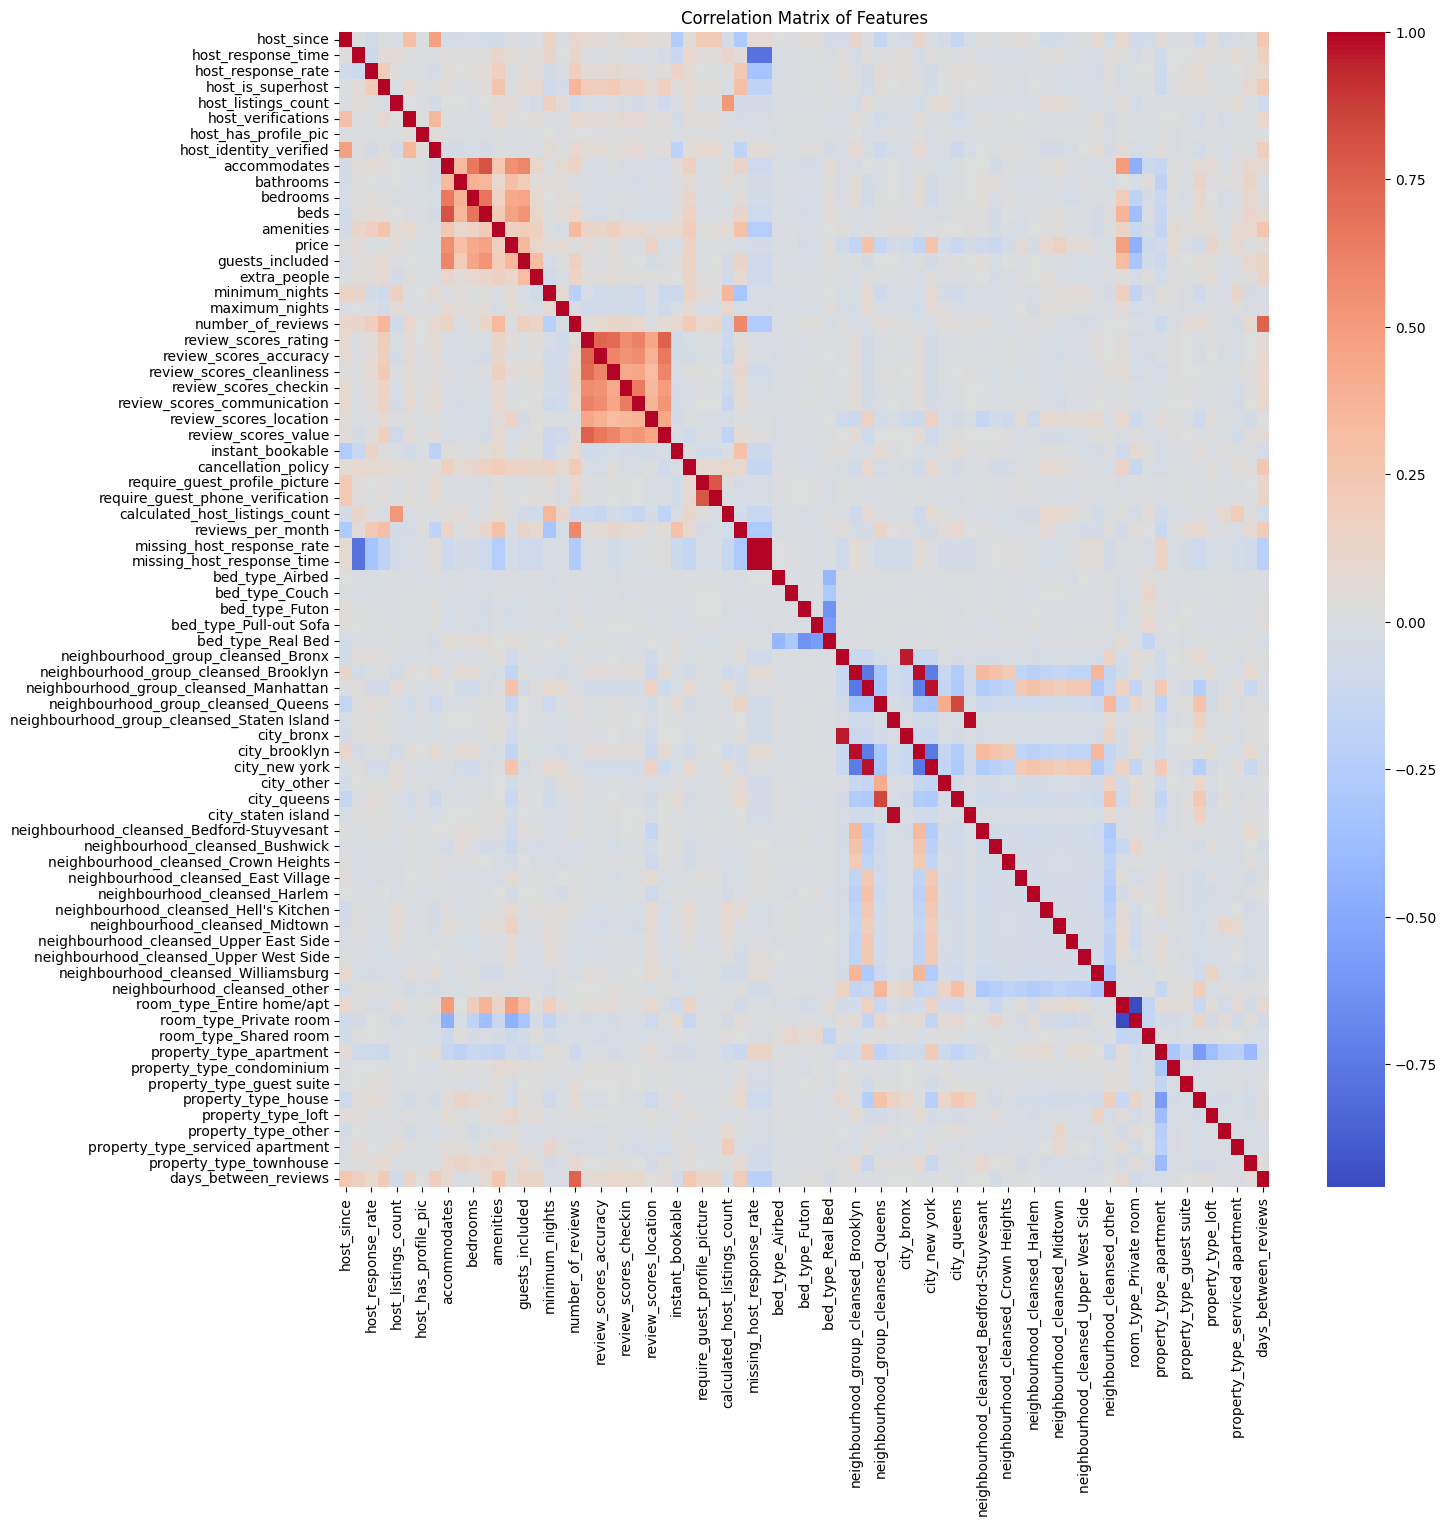

In [168]:
# Plot Correlation Matrix
corr_matrix = trainDF.corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.title("Correlation Matrix of Features")
plt.show()

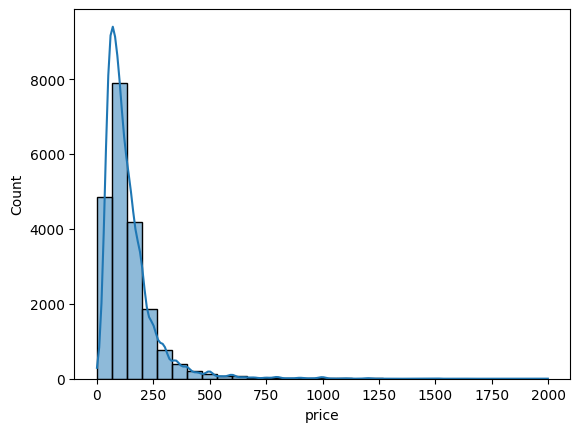

In [169]:
# Plot Histogram
sns.histplot(trainDF["price"], bins=30, kde=True)
plt.show()

# Histogram shows that the target variable is right skewed

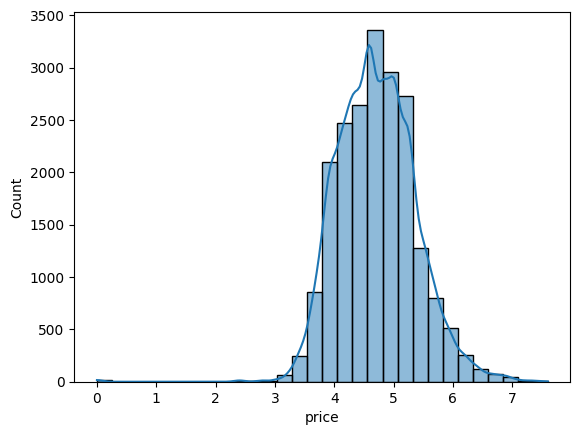

In [170]:
# Applied log transformation to make the target variable more symmetric
trainDF["price"] = np.log1p(trainDF["price"])
sns.histplot(trainDF["price"], bins=30, kde=True)
plt.show()

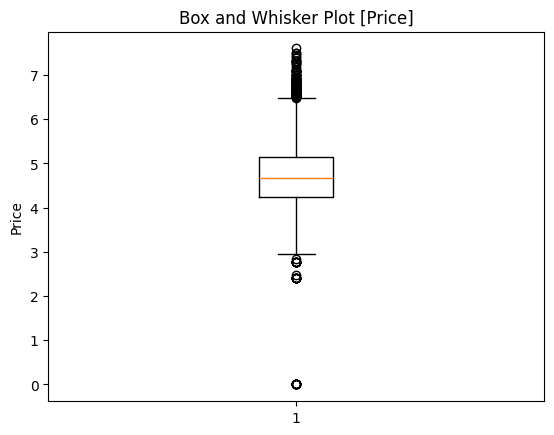

In [171]:
# Plot Box and Whisker plot

plt.boxplot(trainDF["price"])
plt.title("Box and Whisker Plot [Price]")
plt.ylabel("Price")
plt.show()

## Data Splitting

In [174]:
# Split data 80-20 using train test split

X = trainDF.drop(columns=["price"], axis=1)
y = trainDF["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(16456, 72) (4115, 72)
(16456,) (4115,)


Data Quality Issues

- In terms of data quality issues, this dataset has many missing/ NA values as well as context dependent data. For example, features such as "summary" and "description" are textual data, specific to each listing and can't be used as a comparison metric.
- The data itself had many features that added little to no value such as country, where all samples listed united states
- Features such as amenities were difficult to work with due to the number of amenities per sample

# 1. Model Training (60 points)

Train at least 3 models. You can evaluate more than 3 models and apply your own cross-validation approach to choose the top three models to submit to Kaggle. For each model, include a short write up on each model (desc of selected model, evaluation approach applied, how did you select hyperparameters).  

In [175]:
# Model 1 - Linear Regression (ElasticNet)

# Set iteration limit to 5000
enet = ElasticNet(max_iter=5000)

# Cross validation (10 evenly spaced values between 10^-3 and 10^3)
space = {
    "alpha": np.logspace(-3, 3, 10),
    "l1_ratio": np.linspace(0, 1, 10)
}

# Initialize grid search (5 iterations)
grid_model_1 = GridSearchCV(enet, param_grid=space, scoring="neg_root_mean_squared_error", cv=5)
grid_model_1.fit(X_train, y_train)

# Select optimal parameter
optimal_param_pred = grid_model_1.best_estimator_.predict(X_test)

# Print metrics
print(f"MSE: {mean_squared_error(y_test, optimal_param_pred)}")
print(f"MAE: {mean_absolute_error(y_test, optimal_param_pred)}")
print(f"RMSE: {root_mean_squared_error(y_test, optimal_param_pred)}")

MSE: 0.14199850762921737
MAE: 0.27750673354606875
RMSE: 0.3768268934527064


- I chose ElasticNet as my model because it is essentially the combination of ridge and lasso regression and reaps the benefits of both. 
- The best parameters were selected using GridSearchCV where 10 alpha and l1_ratio values were tested. 
- In terms of performance, an MAE value of 0.2775 signifies that the model's prediction is on average roughly $0.28 off per prediction while its RMSE score of 0.3768 suggests predictions are within $0.38 of the true value. 

In [176]:
# Model 2 - KNN Regressor

knn = KNeighborsRegressor()

space = {
    "n_neighbors": np.linspace(1,50,10, dtype=int),
    "weights": ["uniform", "distance"],
    "p": [1,2],
    "leaf_size": np.linspace(1,50,10, dtype=int)
}

grid_model_2 = GridSearchCV(knn, param_grid=space, scoring="neg_mean_squared_error", cv=5)
grid_model_2.fit(X_train, y_train)

optimal_param_pred = grid_model_2.predict(X_test)

print(f"MSE: {mean_squared_error(optimal_param_pred, y_test)}")
print(f"MAE: {mean_absolute_error(optimal_param_pred, y_test)}")
print(f"RMSE: {root_mean_squared_error(optimal_param_pred, y_test)}") 

MSE: 0.15432011507807364
MAE: 0.2877628429526728
RMSE: 0.39283599004937625


[INSERT WRITE-UP HERE]

In [177]:
# Model 3 - Random Forest Regressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

print(f"MSE: {mean_squared_error(y_pred, y_test)}")
print(f"MAE: {mean_absolute_error(y_pred, y_test)}")
print(f"RMSE: {root_mean_squared_error(y_pred, y_test)}")

MSE: 0.13306527513956012
MAE: 0.2637350035329055
RMSE: 0.36478113320121164


[INSERT WRITE-UP HERE]

# 2. Plotting (10 points)

In [178]:
# Plot results here
# [INSERT CODE HERE]

In [179]:
# Plot - Model 1

scores_model_1 = grid_model_1.cv_results_["params"]
#scores_model_1.keys()
scores_model_1

[{'alpha': np.float64(0.001), 'l1_ratio': np.float64(0.0)},
 {'alpha': np.float64(0.001), 'l1_ratio': np.float64(0.1111111111111111)},
 {'alpha': np.float64(0.001), 'l1_ratio': np.float64(0.2222222222222222)},
 {'alpha': np.float64(0.001), 'l1_ratio': np.float64(0.3333333333333333)},
 {'alpha': np.float64(0.001), 'l1_ratio': np.float64(0.4444444444444444)},
 {'alpha': np.float64(0.001), 'l1_ratio': np.float64(0.5555555555555556)},
 {'alpha': np.float64(0.001), 'l1_ratio': np.float64(0.6666666666666666)},
 {'alpha': np.float64(0.001), 'l1_ratio': np.float64(0.7777777777777777)},
 {'alpha': np.float64(0.001), 'l1_ratio': np.float64(0.8888888888888888)},
 {'alpha': np.float64(0.001), 'l1_ratio': np.float64(1.0)},
 {'alpha': np.float64(0.004641588833612777), 'l1_ratio': np.float64(0.0)},
 {'alpha': np.float64(0.004641588833612777),
  'l1_ratio': np.float64(0.1111111111111111)},
 {'alpha': np.float64(0.004641588833612777),
  'l1_ratio': np.float64(0.2222222222222222)},
 {'alpha': np.float64

[INSERT WRITE-UP HERE]

# 3. Discussion (10 points)

# include a short discussion about results and approach.

Note, the rest of the points are based on Kaggle submission and ranking.

# References / Disclosure

- https://scikit-learn.org/stable/user_guide.html 
- https://pandas.pydata.org/docs/user_guide/index.html
- https://matplotlib.org/stable/users/index 
- https://numpy.org/doc/stable/user/index.html
- https://www.geeksforgeeks.org/machine-learning/machine-learning-algorithms/
